In [279]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import seaborn as sns
%matplotlib inline

In [280]:
pd.set_option('display.max_rows',None)

In [281]:
fraud_df = pd.read_csv("C:\Books\ML Project\insurance_claims.csv",index_col='policy_number')

In [282]:
#fraud_df = pd.read_csv("C:\Books\ML Project\insurance_claims.csv",parse_dates =['policy_bind_date','incident_date'])
#fraud_df

In [283]:
fraud_df.head()

months_as_customer  age policy_bind_date policy_state  \
policy_number                                                          
521585                        328   48       17-10-2014           OH   
342868                        228   42       27-06-2006           IN   
687698                        134   29       06-09-2000           OH   
227811                        256   41       25-05-1990           IL   
367455                        228   44       06-06-2014           IL   

              policy_csl  policy_deductable  policy_annual_premium  \
policy_number                                                        
521585           250/500               1000                1406.91   
342868           250/500               2000                1197.22   
687698           100/300               2000                1413.14   
227811           250/500               2000                1415.74   
367455          500/1000               1000                1583.91   

               umbrella_limit  insured_zip insured_sex  ... witnesses  \
policy_number                                           ...             
521585                      0       466132        MALE  ...         2   
342868                5000000       468176        MALE  ...         0   
687698                5000000       430632      FEMALE  ...         3   
227811                6000000       608117      FEMALE  ...         2   
367455                6000000       610706        MALE  ...         1   

              police_report_available total_claim_amount injury_claim  \
policy_number                                                           
521585                            YES              71610         6510   
342868                              ?               5070          780   
687698                             NO              34650         7700   
227811                             NO              63400         6340   
367455                             NO               6500         1300   

               property_claim  vehicle_claim  auto_make auto_model auto_year  \
policy_number                                                                  
521585                  13020          52080       Saab        92x      2004   
342868                    780           3510   Mercedes       E400      2007   
687698                   3850          23100      Dodge        RAM      2007   
227811                   6340          50720  Chevrolet      Tahoe      2014   
367455                    650           4550     Accura        RSX      2009   

              fraud_reported  
policy_number                 
521585                     Y  
342868                     Y  
687698                     N  
227811                     Y  
367455                     N  

[5 rows x 38 columns]

In [284]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 521585 to 556080
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_bind_date             1000 non-null   object 
 3   policy_state                 1000 non-null   object 
 4   policy_csl                   1000 non-null   object 
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        1000 non-null   float64
 7   umbrella_limit               1000 non-null   int64  
 8   insured_zip                  1000 non-null   int64  
 9   insured_sex                  1000 non-null   object 
 10  insured_education_level      1000 non-null   object 
 11  insured_occupation           1000 non-null   object 
 12  insured_hobbies              1000 non-null   object 
 13  insured_rel

In [285]:
fraud_df.fraud_reported.value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

## EDA 

In [286]:
fraud_df.shape

(1000, 38)

In [287]:
fraud_df.isnull().sum()

months_as_customer             0
age                            0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_clai

In [288]:
fraud_df.describe()

months_as_customer          age  policy_deductable  \
count         1000.000000  1000.000000        1000.000000   
mean           203.954000    38.948000        1136.000000   
std            115.113174     9.140287         611.864673   
min              0.000000    19.000000         500.000000   
25%            115.750000    32.000000         500.000000   
50%            199.500000    38.000000        1000.000000   
75%            276.250000    44.000000        2000.000000   
max            479.000000    64.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean   -26793.700000                 11.644000                      1.83900   
std     28104.096686                  6.951373                      1.01888   
min   -111100.000000                  0.000000                      1.00000   
25%    -51500.000000                  6.000000                      1.00000   
50%    -23250.000000                 12.000000                      1.00000   
75%         0.000000                 17.000000                      3.00000   
max         0.000000                 23.000000                      4.00000   

       bodily_injuries    witnesses  total_claim_amount  injury_claim  \
count      1000.000000  1000.000000          1000.00000   1000.000000   
mean          0.992000     1.487000         52761.94000   7433.420000   
std           0.820127     1.111335         26401.53319   4880.951853   
min           0.000000     0.000000           100.00000      0.000000   
25%           0.000000     1.000000         41812.50000   4295.000000   
50%           1.000000     1.000000         58055.00000   6775.000000   
75%           2.000000     2.000000         70592.50000  11305.000000   
max           2.000000     3.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_year  
count     1000.000000    1000.000000  1000.000000  
mean      7399.570000   37928.950000  2005.103000  
std       4824.726179   18886.252893     6.015861  
min          0.000000      70.000000  1995.000000  
25%       4445.000000   30292.500000  2000.000000  
50%       6750.000000   42100.000000  2005.000000  
75%      10885.000000   50822.500000  2010.000000  
max      23670.000000   79560.000000  2015.000000

In [289]:
fraud_df.auto_year.value_counts()

1995    56
1999    55
2005    54
2011    53
2006    53
2007    52
2003    51
2010    50
2009    50
2013    49
2002    49
2015    47
1997    46
2012    46
2008    45
2014    44
2001    42
2000    42
1998    40
2004    39
1996    37
Name: auto_year, dtype: int64

In [290]:
fraud_df['auto_make'].value_counts()

Suburu        80
Saab          80
Dodge         80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Volkswagen    68
Accura        68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64

In [291]:
fraud_df.auto_model.value_counts()

RAM               43
Wrangler          42
A3                37
Neon              37
MDX               36
Jetta             35
Passat            33
A5                32
Legacy            32
Pathfinder        31
Malibu            30
Forrestor         28
92x               28
Camry             28
F150              27
E400              27
95                27
Grand Cherokee    25
93                25
Tahoe             24
Escape            24
Maxima            24
X5                23
Ultima            23
Silverado         22
Civic             22
Highlander        22
Fusion            21
ML350             20
Corolla           20
CRV               20
Impreza           20
TL                20
3 Series          18
C300              18
X6                16
M5                15
Accord            13
RSX               12
Name: auto_model, dtype: int64

## Univariate and Multivariate Analysis

<AxesSubplot:xlabel='age'>

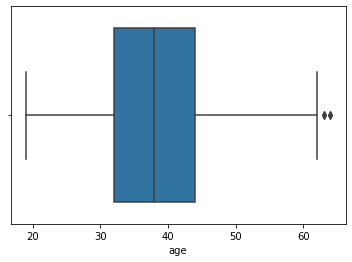

In [292]:
sns.boxplot(x=fraud_df['age'])

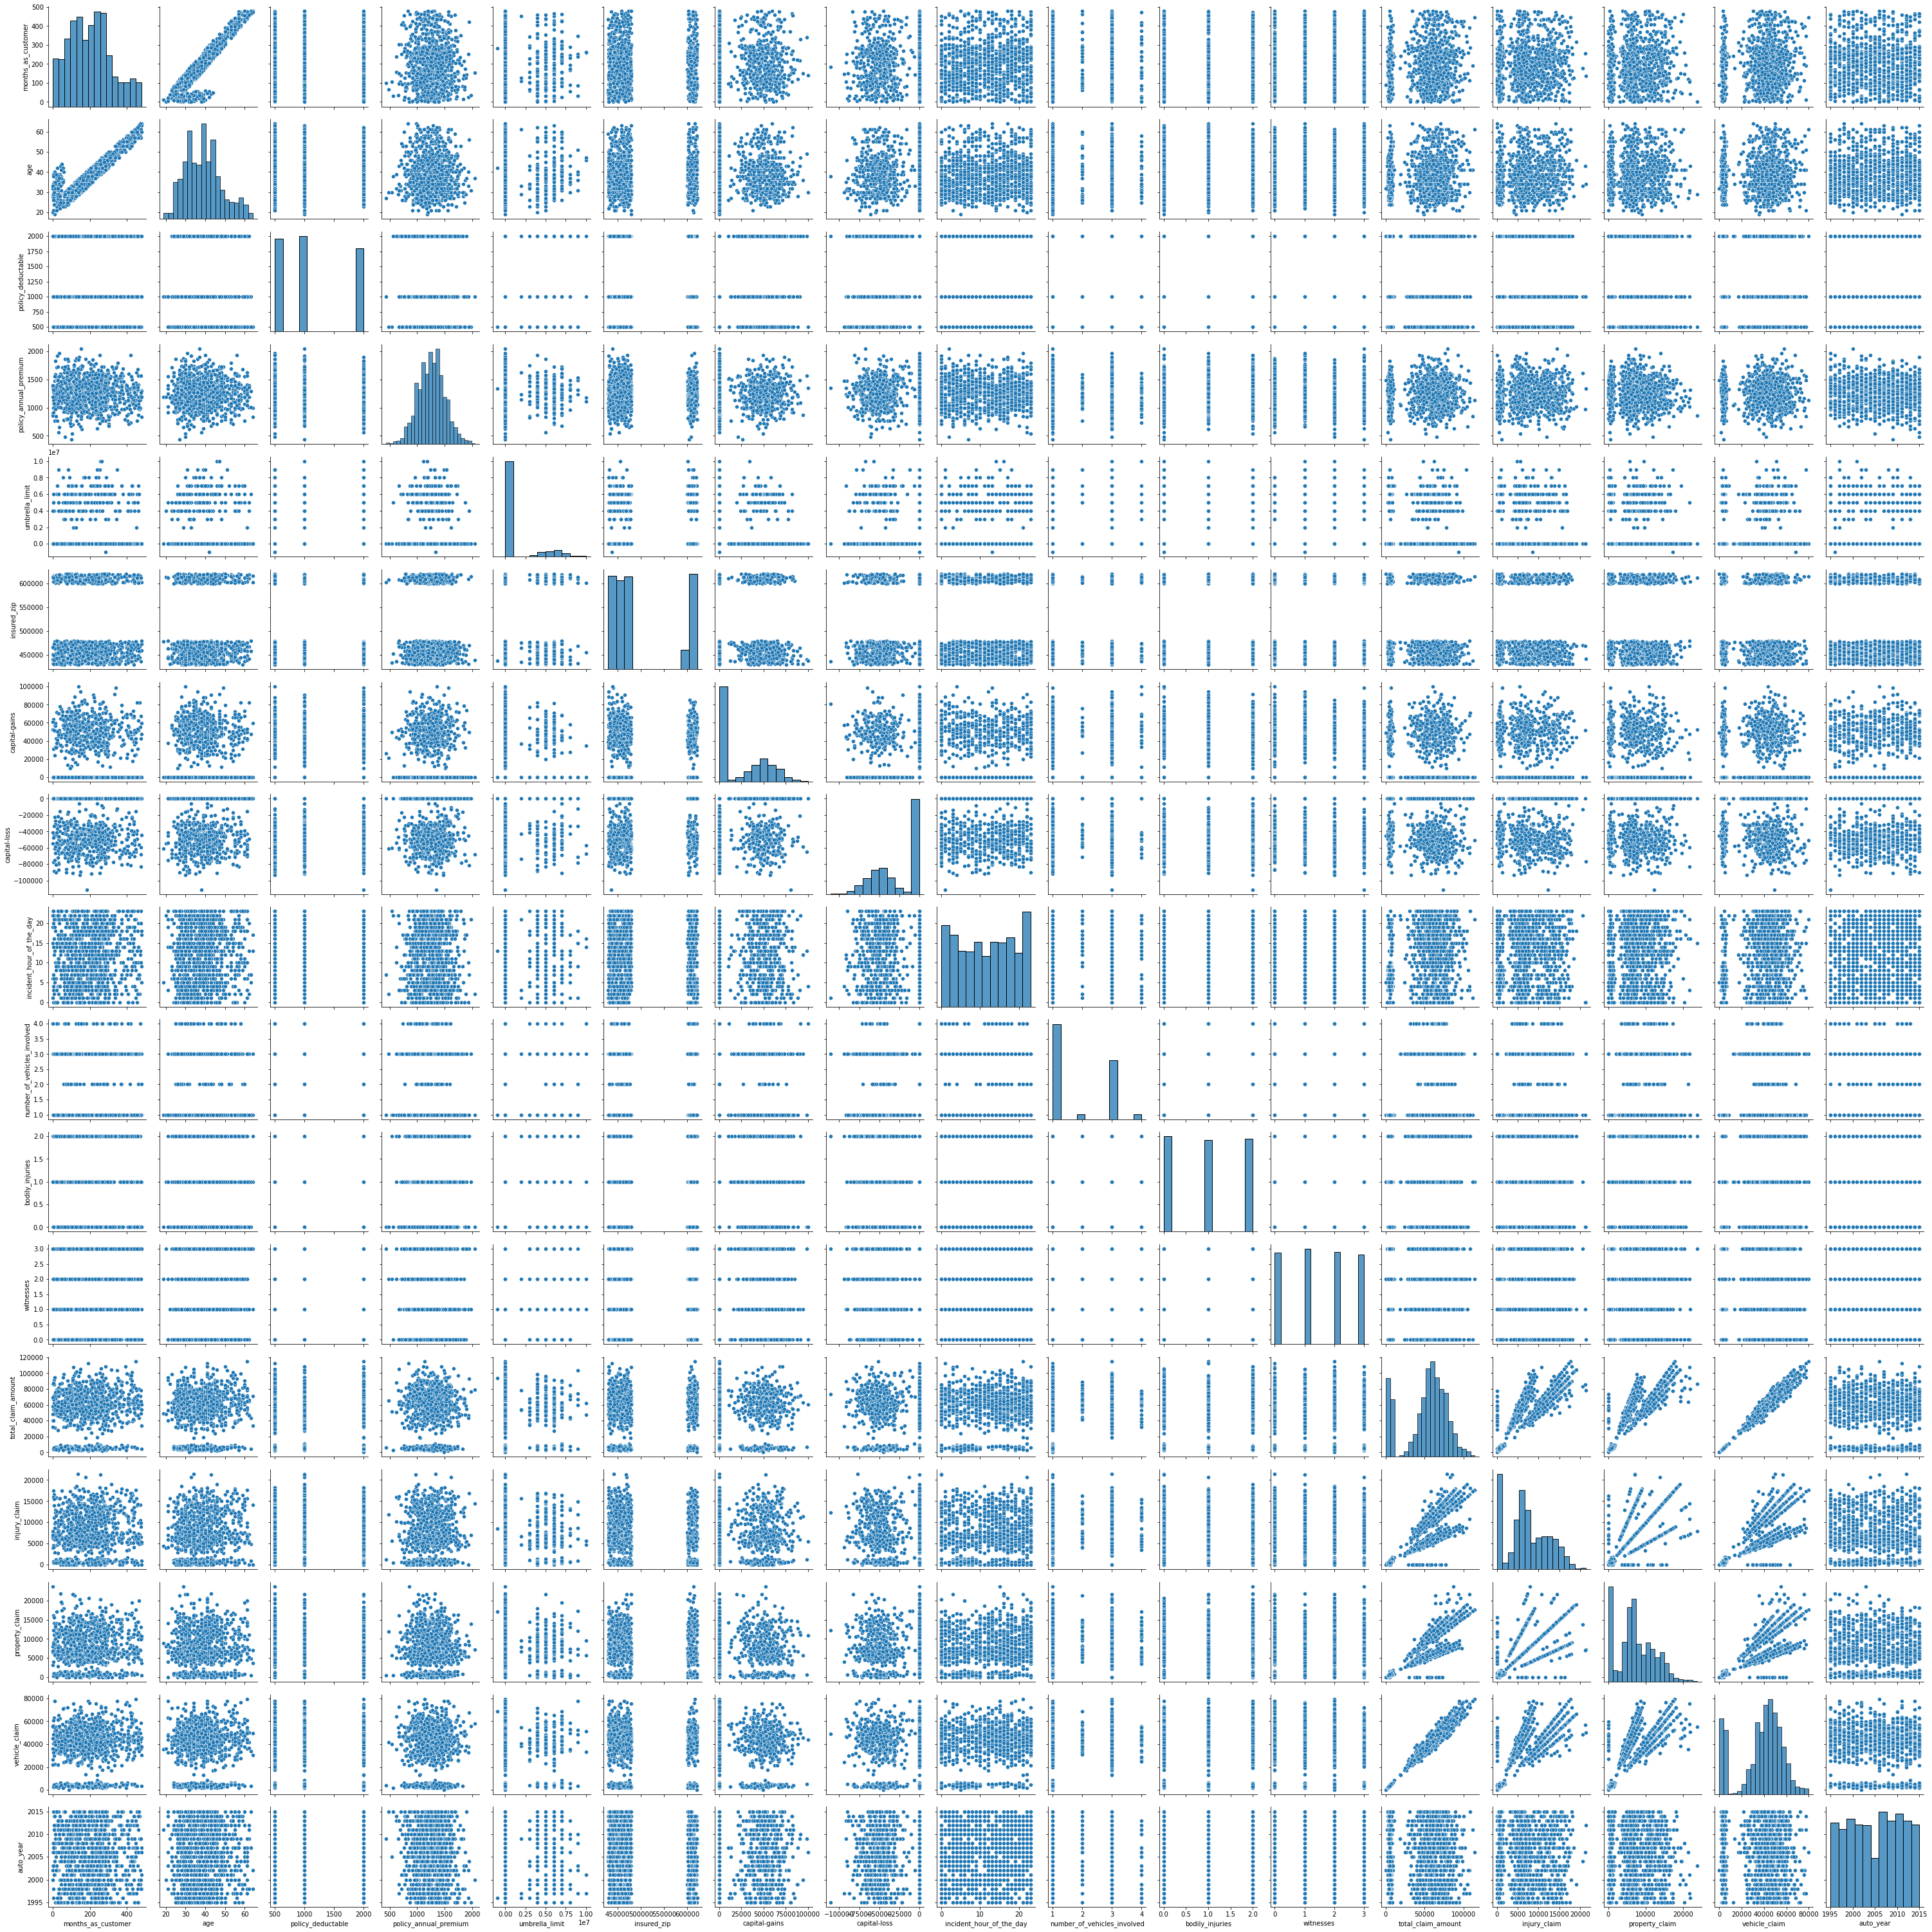

In [293]:
sns.pairplot(fraud_df)

In [294]:
fraud_df.head(10)

months_as_customer  age policy_bind_date policy_state  \
policy_number                                                          
521585                        328   48       17-10-2014           OH   
342868                        228   42       27-06-2006           IN   
687698                        134   29       06-09-2000           OH   
227811                        256   41       25-05-1990           IL   
367455                        228   44       06-06-2014           IL   
104594                        256   39       12-10-2006           OH   
413978                        137   34       04-06-2000           IN   
429027                        165   37       03-02-1990           IL   
485665                         27   33       05-02-1997           IL   
636550                        212   42       25-07-2011           IL   

              policy_csl  policy_deductable  policy_annual_premium  \
policy_number                                                        
521585           250/500               1000                1406.91   
342868           250/500               2000                1197.22   
687698           100/300               2000                1413.14   
227811           250/500               2000                1415.74   
367455          500/1000               1000                1583.91   
104594           250/500               1000                1351.10   
413978           250/500               1000                1333.35   
429027           100/300               1000                1137.03   
485665           100/300                500                1442.99   
636550           100/300                500                1315.68   

               umbrella_limit  insured_zip insured_sex  ... witnesses  \
policy_number                                           ...             
521585                      0       466132        MALE  ...         2   
342868                5000000       468176        MALE  ...         0   
687698                5000000       430632      FEMALE  ...         3   
227811                6000000       608117      FEMALE  ...         2   
367455                6000000       610706        MALE  ...         1   
104594                      0       478456      FEMALE  ...         2   
413978                      0       441716        MALE  ...         0   
429027                      0       603195        MALE  ...         2   
485665                      0       601734      FEMALE  ...         1   
636550                      0       600983        MALE  ...         1   

              police_report_available total_claim_amount injury_claim  \
policy_number                                                           
521585                            YES              71610         6510   
342868                              ?               5070          780   
687698                             NO              34650         7700   
227811                             NO              63400         6340   
367455                             NO               6500         1300   
104594                             NO              64100         6410   
413978                              ?              78650        21450   
429027                            YES              51590         9380   
485665                            YES              27700         2770   
636550                              ?              42300         4700   

               property_claim  vehicle_claim  auto_make  auto_model auto_year  \
policy_number                                                                   
521585                  13020          52080       Saab         92x      2004   
342868                    780           3510   Mercedes        E400      2007   
687698                   3850          23100      Dodge         RAM      2007   
227811                   6340          50720  Chevrolet       Tahoe      2014   
367455                    650           4550     Accura         RSX  

<AxesSubplot:xlabel='months_as_customer', ylabel='fraud_reported'>

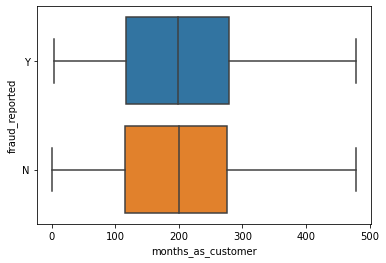

In [295]:
sns.boxplot(x=fraud_df['months_as_customer'],y=fraud_df['fraud_reported'])

##### Inference
###### We can see that few of the columns are not significant
###### We can see that months_as_customer and fraud_reported follow normal distribution

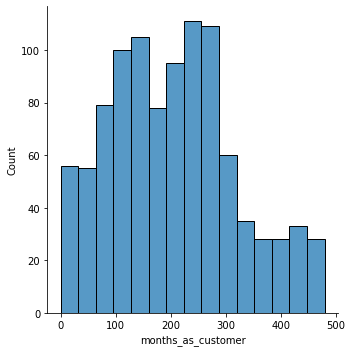

In [296]:
sns.displot(fraud_df['months_as_customer'])

C:\Users\TSK\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='age', ylabel='Density'>

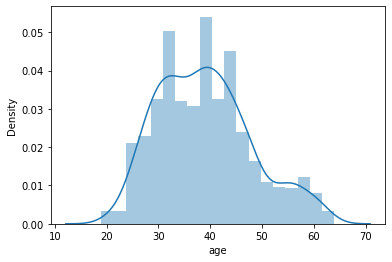

In [297]:
sns.distplot(fraud_df['age'])

C:\Users\TSK\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='auto_make', ylabel='count'>

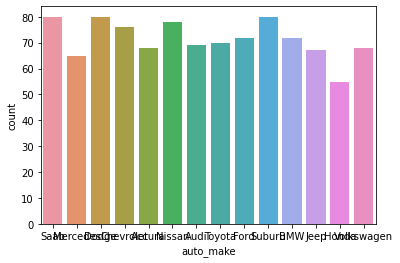

In [298]:
sns.countplot(fraud_df.auto_make)

C:\Users\TSK\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

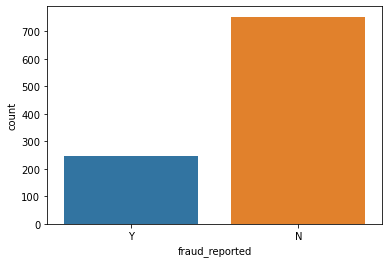

In [299]:
sns.countplot(fraud_df.fraud_reported)

## Data Cleaning and Preprocessing 

In [300]:
num=[]
cat=[]
for i in fraud_df.columns:
    if fraud_df[i].dtype=='object':
        cat.append(i)
    else:
        num.append(i)

In [301]:
print(cat)

['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']


In [302]:
print(num)

['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year']


In [303]:
fraud_df[num].describe().T

count          mean           std         min  \
months_as_customer           1000.0  2.039540e+02  1.151132e+02        0.00   
age                          1000.0  3.894800e+01  9.140287e+00       19.00   
policy_deductable            1000.0  1.136000e+03  6.118647e+02      500.00   
policy_annual_premium        1000.0  1.256406e+03  2.441674e+02      433.33   
umbrella_limit               1000.0  1.101000e+06  2.297407e+06 -1000000.00   
insured_zip                  1000.0  5.012145e+05  7.170161e+04   430104.00   
capital-gains                1000.0  2.512610e+04  2.787219e+04        0.00   
capital-loss                 1000.0 -2.679370e+04  2.810410e+04  -111100.00   
incident_hour_of_the_day     1000.0  1.164400e+01  6.951373e+00        0.00   
number_of_vehicles_involved  1000.0  1.839000e+00  1.018880e+00        1.00   
bodily_injuries              1000.0  9.920000e-01  8.201272e-01        0.00   
witnesses                    1000.0  1.487000e+00  1.111335e+00        0.00   
total_claim_amount           1000.0  5.276194e+04  2.640153e+04      100.00   
injury_claim                 1000.0  7.433420e+03  4.880952e+03        0.00   
property_claim               1000.0  7.399570e+03  4.824726e+03        0.00   
vehicle_claim                1000.0  3.792895e+04  1.888625e+04       70.00   
auto_year                    1000.0  2.005103e+03  6.015861e+00     1995.00   

                                     25%       50%         75%          max  
months_as_customer              115.7500     199.5     276.250       479.00  
age                              32.0000      38.0      44.000        64.00  
policy_deductable               500.0000    1000.0    2000.000      2000.00  
policy_annual_premium          1089.6075    1257.2    1415.695      2047.59  
umbrella_limit                    0.0000       0.0       0.000  10000000.00  
insured_zip                  448404.5000  466445.5  603251.000    620962.00  
capital-gains                     0.0000       0.0   51025.000    100500.00  
capital-loss                 -51500.0000  -23250.0       0.000         0.00  
incident_hour_of_the_day          6.0000      12.0      17.000        23.00  
number_of_vehicles_involved       1.0000       1.0       3.000         4.00  
bodily_injuries                   0.0000       1.0       2.000         2.00  
witnesses                         1.0000       1.0       2.000         3.00  
total_claim_amount            41812.5000   58055.0   70592.500    114920.00  
injury_claim                   4295.0000    6775.0   11305.000     21450.00  
property_claim                 4445.0000    6750.0   10885.000     23670.00  
vehicle_claim                 30292.5000   42100.0   50822.500     79560.00  
auto_year                      2000.0000    2005.0    2010.000      2015.00

In [304]:
fraud_df.replace({'umbrella_limit':-1000000.00},{'umbrella_limit':0},inplace=True)

In [305]:
fraud_df[num].describe().T

count          mean           std        min  \
months_as_customer           1000.0  2.039540e+02  1.151132e+02       0.00   
age                          1000.0  3.894800e+01  9.140287e+00      19.00   
policy_deductable            1000.0  1.136000e+03  6.118647e+02     500.00   
policy_annual_premium        1000.0  1.256406e+03  2.441674e+02     433.33   
umbrella_limit               1000.0  1.102000e+06  2.296709e+06       0.00   
insured_zip                  1000.0  5.012145e+05  7.170161e+04  430104.00   
capital-gains                1000.0  2.512610e+04  2.787219e+04       0.00   
capital-loss                 1000.0 -2.679370e+04  2.810410e+04 -111100.00   
incident_hour_of_the_day     1000.0  1.164400e+01  6.951373e+00       0.00   
number_of_vehicles_involved  1000.0  1.839000e+00  1.018880e+00       1.00   
bodily_injuries              1000.0  9.920000e-01  8.201272e-01       0.00   
witnesses                    1000.0  1.487000e+00  1.111335e+00       0.00   
total_claim_amount           1000.0  5.276194e+04  2.640153e+04     100.00   
injury_claim                 1000.0  7.433420e+03  4.880952e+03       0.00   
property_claim               1000.0  7.399570e+03  4.824726e+03       0.00   
vehicle_claim                1000.0  3.792895e+04  1.888625e+04      70.00   
auto_year                    1000.0  2.005103e+03  6.015861e+00    1995.00   

                                     25%       50%         75%          max  
months_as_customer              115.7500     199.5     276.250       479.00  
age                              32.0000      38.0      44.000        64.00  
policy_deductable               500.0000    1000.0    2000.000      2000.00  
policy_annual_premium          1089.6075    1257.2    1415.695      2047.59  
umbrella_limit                    0.0000       0.0       0.000  10000000.00  
insured_zip                  448404.5000  466445.5  603251.000    620962.00  
capital-gains                     0.0000       0.0   51025.000    100500.00  
capital-loss                 -51500.0000  -23250.0       0.000         0.00  
incident_hour_of_the_day          6.0000      12.0      17.000        23.00  
number_of_vehicles_involved       1.0000       1.0       3.000         4.00  
bodily_injuries                   0.0000       1.0       2.000         2.00  
witnesses                         1.0000       1.0       2.000         3.00  
total_claim_amount            41812.5000   58055.0   70592.500    114920.00  
injury_claim                   4295.0000    6775.0   11305.000     21450.00  
property_claim                 4445.0000    6750.0   10885.000     23670.00  
vehicle_claim                 30292.5000   42100.0   50822.500     79560.00  
auto_year                      2000.0000    2005.0    2010.000      2015.00

In [306]:
fraud_df[cat].describe().T

count unique                      top freq
policy_bind_date         1000    951               01-01-2006    3
policy_state             1000      3                       OH  352
policy_csl               1000      3                  250/500  351
insured_sex              1000      2                   FEMALE  537
insured_education_level  1000      7                       JD  161
insured_occupation       1000     14        machine-op-inspct   93
insured_hobbies          1000     20                  reading   64
insured_relationship     1000      6                own-child  183
incident_date            1000     60               02-02-2015   28
incident_type            1000      4  Multi-vehicle Collision  419
collision_type           1000      4           Rear Collision  292
incident_severity        1000      4             Minor Damage  354
authorities_contacted    1000      5                   Police  292
incident_state           1000      7                       NY  262
incident_city            1000      7              Springfield  157
incident_location        1000   1000           9043 Maple Hwy    1
property_damage          1000      3                        ?  360
police_report_available  1000      3                       NO  343
auto_make                1000     14                   Suburu   80
auto_model               1000     39                      RAM   43
fraud_reported           1000      2                        N  753

In [307]:
fraud_df.loc[fraud_df['property_damage'] == '?']

months_as_customer  age policy_bind_date policy_state  \
policy_number                                                          
342868                        228   42       27-06-2006           IN   
227811                        256   41       25-05-1990           IL   
413978                        137   34       04-06-2000           IN   
429027                        165   37       03-02-1990           IL   
558938                         70   26       08-06-2005           OH   
143972                        196   39       02-08-1992           IN   
431876                        217   41       27-11-2005           IL   
115399                        413   55       08-02-1991           IN   
200152                         62   28       09-03-2003           IL   
485664                        431   54       25-11-2002           IN   
982871                        199   37       27-07-1997           IN   
616337                        116   34       30-08-2012           IN   
866931                        175   34       07-01-2008           IN   
691189                        430   59       10-01-2004           OH   
537546                         91   27       20-08-1994           IL   
394975                        217   39       02-06-2002           IN   
524836                        439   56       20-11-2008           IN   
486676                        271   42       15-08-2011           OH   
279422                        227   38       27-10-2013           OH   
645258                        244   40       04-07-1997           OH   
498140                        284   48       15-05-1997           IN   
614763                        134   32       02-01-1991           IL   
740019                        295   48       17-06-2009           OH   
389238                        279   41       06-06-2001           IL   
632627                        464   61       07-10-1990           OH   
163161                        298   47       11-11-1998           IL   
776860                        261   42       11-01-2009           OH   
395269                        210   41       02-11-2012           IL   
981123                        168   32       04-05-2000           IN   
330591                        225   41       05-08-1993           OH   
531640                        245   39       21-04-2001           OH   
155724                        203   38       20-02-1998           IL   
428230                        165   32       04-06-2012           IN   
469874                         81   28       17-09-2011           IL   
620215                        194   39       27-07-2005           IN   
618659                        112   27       18-10-2005           OH   
649082                         24   33       19-01-1996           IL   
437573                         93   32       29-09-2005           OH   
932502                        200   40       11-05-2010           IL   
935277                        325   46       09-07-2013           IL   
456604                        287   41       29-03-2004           IL   
139872                        122   34       01-06-2006           IN   
354105                         22   29       08-06-1994           IN   
165485                        106   31       12-02-1998           IL   
795686                        214   41       24-10-2004           IL   
395983                        209   38       08-11-2009           OH   
217938                        193   41       16-07-1995           OH   
203914                        134   32       09-06-2001           OH   
565157                        288   45       06-10-2002           IL   
781181                        461   61       27-06-2005           OH   
299796                        428   59       29-09-1999           IN   
589749                         45   38       14-05-2006           IN   
854021                        136   29       29-04-2010           OH   
139484                        278   48       24-07-1999

In [308]:
fraud_df.replace({'property_damage':'?'},{'property_damage':'Unknown'},inplace=True)

In [309]:
fraud_df.replace({'collision_type':'?'},{'collision_type':'Unknown'},inplace=True)

In [310]:
fraud_df.replace({'police_report_available':'?'},{'police_report_available':'Unknown'},inplace=True)

In [311]:
fraud_df[cat].describe().T

count unique                      top freq
policy_bind_date         1000    951               01-01-2006    3
policy_state             1000      3                       OH  352
policy_csl               1000      3                  250/500  351
insured_sex              1000      2                   FEMALE  537
insured_education_level  1000      7                       JD  161
insured_occupation       1000     14        machine-op-inspct   93
insured_hobbies          1000     20                  reading   64
insured_relationship     1000      6                own-child  183
incident_date            1000     60               02-02-2015   28
incident_type            1000      4  Multi-vehicle Collision  419
collision_type           1000      4           Rear Collision  292
incident_severity        1000      4             Minor Damage  354
authorities_contacted    1000      5                   Police  292
incident_state           1000      7                       NY  262
incident_city            1000      7              Springfield  157
incident_location        1000   1000           9043 Maple Hwy    1
property_damage          1000      3                  Unknown  360
police_report_available  1000      3                       NO  343
auto_make                1000     14                   Suburu   80
auto_model               1000     39                      RAM   43
fraud_reported           1000      2                        N  753

<AxesSubplot:>

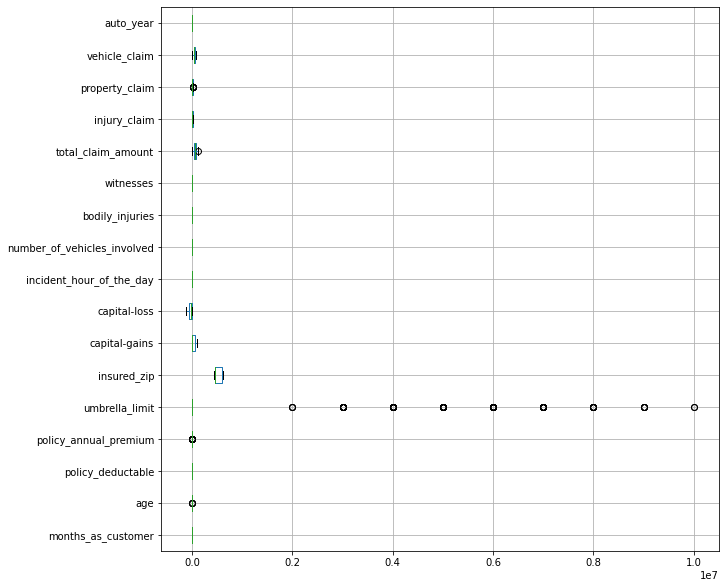

In [312]:
plt.figure(figsize=(10,10))
fraud_df.boxplot(vert=0)

###### We find umbrella limit having outliers 

In [313]:
# fraud_df_cp = fraud_df.copy()
# fraud_df_cp.drop('policy_bind_date',axis=1,inplace=True)
# fraud_df_cp.drop('incident_date',axis=1,inplace=True)
#fraud_df_X = fraud_df_cp.drop('fraud_reported',axis=1)
#fraud_df_Y = fraud_df_cp_upd['fraud_reported']

In [314]:
fraud_df_X = fraud_df.drop('fraud_reported',axis=1)
fraud_df_Y = fraud_df['fraud_reported']

In [315]:
fraud_df_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 521585 to 556080
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_bind_date             1000 non-null   object 
 3   policy_state                 1000 non-null   object 
 4   policy_csl                   1000 non-null   object 
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        1000 non-null   float64
 7   umbrella_limit               1000 non-null   int64  
 8   insured_zip                  1000 non-null   int64  
 9   insured_sex                  1000 non-null   object 
 10  insured_education_level      1000 non-null   object 
 11  insured_occupation           1000 non-null   object 
 12  insured_hobbies              1000 non-null   object 
 13  insured_rel

In [316]:
Q1 = fraud_df_X.quantile(0.25)
Q3=fraud_df_X.quantile(0.75)
IQR=Q3-Q1
UL = Q3+1.5*IQR
LL=Q1-1.5*IQR

In [317]:
((fraud_df_X > UL) | (fraud_df_X < LL)).sum()

age                              4
authorities_contacted            0
auto_make                        0
auto_model                       0
auto_year                        0
bodily_injuries                  0
capital-gains                    0
capital-loss                     0
collision_type                   0
incident_city                    0
incident_date                    0
incident_hour_of_the_day         0
incident_location                0
incident_severity                0
incident_state                   0
incident_type                    0
injury_claim                     0
insured_education_level          0
insured_hobbies                  0
insured_occupation               0
insured_relationship             0
insured_sex                      0
insured_zip                      0
months_as_customer               0
number_of_vehicles_involved      0
police_report_available          0
policy_annual_premium            9
policy_bind_date                 0
policy_csl          

In [318]:
fraud_df_X[((fraud_df_X > UL) | (fraud_df_X < LL))]=np.nan

In [319]:
fraud_df_X.isnull().sum()

months_as_customer               0
age                              4
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            9
umbrella_limit                 201
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                   0
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                  0
bodily_injuries                  0
witnesses           

In [320]:
fraud_df_X.isnull().sum().sum()

221

In [321]:
fraud_df_up = pd.concat([fraud_df_X,fraud_df_Y],axis=1)

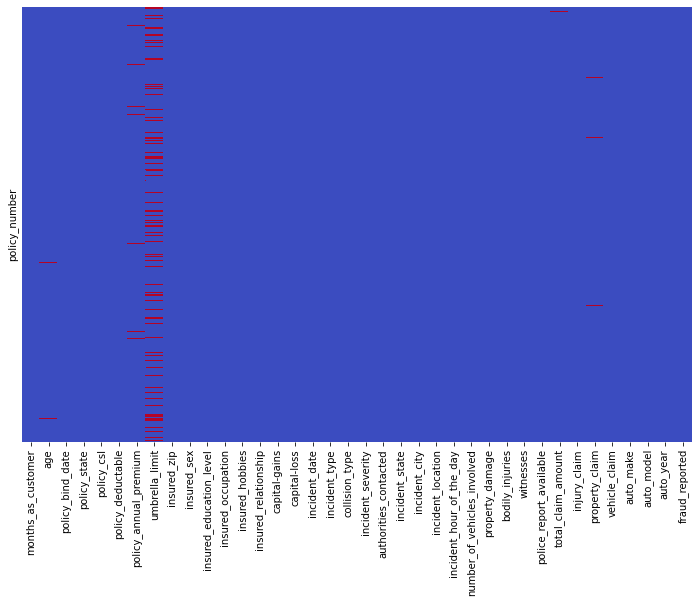

In [322]:
plt.figure(figsize=(12,8))
sns.heatmap(fraud_df_up.isnull(),cbar=False,cmap='coolwarm',yticklabels=False)
plt.show()

##### umbrella_limit has high outliers

In [323]:
fraud_df_up.isnull().sum(axis=1)

policy_number
521585    0
342868    1
687698    1
227811    1
367455    1
104594    0
413978    0
429027    0
485665    0
636550    0
543610    1
214618    1
842643    1
626808    0
644081    0
892874    0
558938    1
275265    1
921202    0
143972    0
183430    1
431876    0
285496    0
115399    0
736882    0
699044    0
863236    0
608513    1
914088    0
596785    0
908616    0
666333    1
336614    0
584859    0
990493    0
129872    1
200152    0
933293    0
485664    0
982871    0
206213    0
616337    0
448961    0
790442    1
108844    0
430029    0
529112    0
939631    1
866931    1
582011    0
691189    1
537546    0
394975    0
729634    0
282195    0
420810    0
524836    0
307195    0
623648    0
485372    0
598554    0
303987    0
343161    0
519312    0
132902    1
332867    0
356590    1
346002    1
500533    0
348209    0
486676    0
260845    0
657045    0
761189    0
175177    0
116700    0
166264    0
527945    0
627540    1
279422    0
484200    0
645258    1
69

In [324]:
fraud_df_up2=fraud_df_up.copy()

In [325]:
fraud_df_up2.shape

(1000, 38)

In [326]:
pred = fraud_df_up2.drop('fraud_reported',axis=1)
response = fraud_df_up2['fraud_reported']

In [327]:
fraud_con = pd.concat([pred,response],axis=1)

##### Scaling the predictors 

##### Encoding the variables

In [328]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder


In [329]:
fraud_con["insured_sex"] = np.where(fraud_con["insured_sex"].str.contains("FEMALE"), 1, 0)

In [330]:
fraud_con.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 521585 to 556080
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          996 non-null    float64
 2   policy_bind_date             1000 non-null   object 
 3   policy_state                 1000 non-null   object 
 4   policy_csl                   1000 non-null   object 
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        991 non-null    float64
 7   umbrella_limit               799 non-null    float64
 8   insured_zip                  1000 non-null   int64  
 9   insured_sex                  1000 non-null   int32  
 10  insured_education_level      1000 non-null   object 
 11  insured_occupation           1000 non-null   object 
 12  insured_hobbies              1000 non-null   object 
 13  insured_rel

In [331]:
fraud_con.insured_education_level.value_counts()

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

In [332]:
# fraud_con['insured_education_level']=np.where(fraud_con#"insured_education_level"]=='JD',''

In [333]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
fraud_con['insured_education_level'] = fraud_con['insured_education_level'].astype('category')
fraud_con.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 521585 to 556080
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   months_as_customer           1000 non-null   int64   
 1   age                          996 non-null    float64 
 2   policy_bind_date             1000 non-null   object  
 3   policy_state                 1000 non-null   object  
 4   policy_csl                   1000 non-null   object  
 5   policy_deductable            1000 non-null   int64   
 6   policy_annual_premium        991 non-null    float64 
 7   umbrella_limit               799 non-null    float64 
 8   insured_zip                  1000 non-null   int64   
 9   insured_sex                  1000 non-null   int32   
 10  insured_education_level      1000 non-null   category
 11  insured_occupation           1000 non-null   object  
 12  insured_hobbies              1000 non-null   object  
 

In [334]:
fraud_con['insured_education_level'] = fraud_con['insured_education_level'].cat.codes

In [335]:
fraud_con.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 521585 to 556080
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          996 non-null    float64
 2   policy_bind_date             1000 non-null   object 
 3   policy_state                 1000 non-null   object 
 4   policy_csl                   1000 non-null   object 
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        991 non-null    float64
 7   umbrella_limit               799 non-null    float64
 8   insured_zip                  1000 non-null   int64  
 9   insured_sex                  1000 non-null   int32  
 10  insured_education_level      1000 non-null   int8   
 11  insured_occupation           1000 non-null   object 
 12  insured_hobbies              1000 non-null   object 
 13  insured_rel

In [336]:
oe=OrdinalEncoder()

In [337]:
fraud_con.police_report_available.value_counts()

NO         343
Unknown    343
YES        314
Name: police_report_available, dtype: int64

In [338]:
fraud_con['police_report_available'] = fraud_con['police_report_available'].astype('category')

In [339]:
fraud_con['police_report_available'] = fraud_con['police_report_available'].cat.codes

In [340]:
fraud_con.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 521585 to 556080
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          996 non-null    float64
 2   policy_bind_date             1000 non-null   object 
 3   policy_state                 1000 non-null   object 
 4   policy_csl                   1000 non-null   object 
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        991 non-null    float64
 7   umbrella_limit               799 non-null    float64
 8   insured_zip                  1000 non-null   int64  
 9   insured_sex                  1000 non-null   int32  
 10  insured_education_level      1000 non-null   int8   
 11  insured_occupation           1000 non-null   object 
 12  insured_hobbies              1000 non-null   object 
 13  insured_rel

In [341]:
fraud_con.auto_make.value_counts()

Suburu        80
Saab          80
Dodge         80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Volkswagen    68
Accura        68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64

In [342]:
fraud_con.insured_education_level.value_counts()

3    161
2    160
0    145
4    144
5    143
6    125
1    122
Name: insured_education_level, dtype: int64

In [343]:
fraud_con['auto_make'] = fraud_con['auto_make'].astype('category')
fraud_con['auto_make'] = fraud_con['auto_make'].cat.codes


In [344]:
fraud_con.auto_make.value_counts()

11    80
10    80
4     80
9     78
3     76
5     72
2     72
12    70
1     69
13    68
0     68
7     67
8     65
6     55
Name: auto_make, dtype: int64

In [345]:
fraud_con.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 521585 to 556080
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          996 non-null    float64
 2   policy_bind_date             1000 non-null   object 
 3   policy_state                 1000 non-null   object 
 4   policy_csl                   1000 non-null   object 
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        991 non-null    float64
 7   umbrella_limit               799 non-null    float64
 8   insured_zip                  1000 non-null   int64  
 9   insured_sex                  1000 non-null   int32  
 10  insured_education_level      1000 non-null   int8   
 11  insured_occupation           1000 non-null   object 
 12  insured_hobbies              1000 non-null   object 
 13  insured_rel

In [346]:
fraud_con.policy_state.value_counts()

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64

In [347]:
fraud_con['policy_state'] = fraud_con['policy_state'].astype('category')
fraud_con['policy_state'] = fraud_con['policy_state'].cat.codes


In [348]:
fraud_con.policy_state.value_counts()

2    352
0    338
1    310
Name: policy_state, dtype: int64

In [349]:
fraud_con.policy_csl.value_counts()

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64

In [350]:
fraud_con['policy_csl'] = fraud_con['policy_csl'].astype('category')
fraud_con['policy_csl'] = fraud_con['policy_csl'].cat.codes

In [351]:
fraud_con.policy_csl.value_counts()

1    351
0    349
2    300
Name: policy_csl, dtype: int64

In [352]:
fraud_con.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 521585 to 556080
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          996 non-null    float64
 2   policy_bind_date             1000 non-null   object 
 3   policy_state                 1000 non-null   int8   
 4   policy_csl                   1000 non-null   int8   
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        991 non-null    float64
 7   umbrella_limit               799 non-null    float64
 8   insured_zip                  1000 non-null   int64  
 9   insured_sex                  1000 non-null   int32  
 10  insured_education_level      1000 non-null   int8   
 11  insured_occupation           1000 non-null   object 
 12  insured_hobbies              1000 non-null   object 
 13  insured_rel

In [353]:
num=[]
cat=[]
for i in fraud_con.columns:
    if fraud_con[i].dtype=='object':
        cat.append(i)
    else:
        num.append(i)

In [354]:
cat

['policy_bind_date',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_date',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'property_damage',
 'auto_model',
 'fraud_reported']

In [355]:
fraud_con.insured_occupation.value_counts()

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

In [356]:
fraud_con.insured_hobbies.value_counts()

reading           64
exercise          57
paintball         57
bungie-jumping    56
golf              55
camping           55
movies            55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64

In [357]:
fraud_con.insured_relationship.value_counts()

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64

In [358]:
fraud_con.incident_severity.value_counts()

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64

In [359]:
fraud_con.authorities_contacted.value_counts()

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64

In [360]:
fraud_con['authorities_contacted'] = fraud_con['authorities_contacted'].astype('category')
fraud_con['authorities_contacted'] = fraud_con['authorities_contacted'].cat.codes

In [361]:
fraud_con.authorities_contacted.value_counts()

4    292
1    223
3    198
0    196
2     91
Name: authorities_contacted, dtype: int64

In [362]:
fraud_con['insured_occupation'] = fraud_con['insured_occupation'].astype('category')
fraud_con['insured_occupation'] = fraud_con['insured_occupation'].cat.codes

In [363]:
fraud_con.insured_occupation.value_counts()

6     93
9     85
12    78
11    76
3     76
2     74
13    72
8     71
7     71
1     69
0     65
10    63
5     54
4     53
Name: insured_occupation, dtype: int64

In [364]:
num=[]
cat=[]
for i in fraud_con.columns:
    if fraud_con[i].dtype=='object':
        cat.append(i)
    else:
        num.append(i)

In [365]:
cat

['policy_bind_date',
 'insured_hobbies',
 'insured_relationship',
 'incident_date',
 'incident_type',
 'collision_type',
 'incident_severity',
 'incident_state',
 'incident_city',
 'incident_location',
 'property_damage',
 'auto_model',
 'fraud_reported']

In [366]:
fraud_con.incident_city.value_counts()

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64

In [367]:
fraud_con['insured_hobbies'] = fraud_con['insured_hobbies'].astype('category')
fraud_con['insured_hobbies'] = fraud_con['insured_hobbies'].cat.codes

In [368]:
fraud_con.insured_hobbies.value_counts()

15    64
8     57
13    57
3     56
9     55
4     55
12    55
11    54
19    53
10    52
18    50
16    49
0     49
2     48
14    47
5     46
7     43
17    41
6     35
1     34
Name: insured_hobbies, dtype: int64

In [369]:
fraud_con.incident_city.value_counts()

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64

In [370]:
fraud_con['incident_city'] = fraud_con['incident_city'].astype('category')
fraud_con['incident_city'] = fraud_con['incident_city'].cat.codes

In [371]:
fraud_con.incident_city.value_counts()

6    157
0    152
1    149
3    145
2    141
5    134
4    122
Name: incident_city, dtype: int64

In [372]:
fraud_con.incident_location.value_counts()

9043 Maple Hwy             1
7721 Washington Ridge      1
7930 Texas Ave             1
7002 Oak Hwy               1
3167 4th Ridge             1
5474 Weaver Hwy            1
5812 Oak St                1
1331 Elm Ridge             1
3808 5th Ave               1
6676 Tree Lane             1
7756 Pine Hwy              1
6128 Elm Lane              1
6256 Elm St                1
6684 Solo Lane             1
3656 Solo Ave              1
7574 4th St                1
8749 Tree St               1
6250 1st Ridge             1
8920 Best Ave              1
4955 Lincoln Ridge         1
8668 Flute St              1
8014 Embaracadero Drive    1
7819 Oak St                1
6501 5th Drive             1
3327 Lincoln Drive         1
7495 Washington Ave        1
2756 Britain Hwy           1
5769 Texas Lane            1
1386 Britain St            1
6859 Flute Ridge           1
4119 Texas St              1
1562 Britain St            1
6493 Lincoln Lane          1
7705 Lincoln Drive         1
8118 Elm Ridge

In [373]:
for column in fraud_con.columns:
    if fraud_con[column].dtype=='object':
        print(column.upper(),':',fraud_con[column].nunique())
        print(fraud_con[column].value_counts().sort_values())
        print('\n')

POLICY_BIND_DATE : 951
12-10-1995    1
11-09-2010    1
25-01-2008    1
28-10-1998    1
11-03-2014    1
25-12-2001    1
10-11-1992    1
28-01-1992    1
06-05-2002    1
07-02-2007    1
01-10-2010    1
10-02-1997    1
19-12-2004    1
29-07-1995    1
15-05-2000    1
04-03-2006    1
18-01-2014    1
21-05-2000    1
19-05-1990    1
24-09-1992    1
05-08-2014    1
22-02-1992    1
22-06-2009    1
02-12-2011    1
18-02-1995    1
28-01-1993    1
24-06-1998    1
27-05-1994    1
26-06-2009    1
01-03-1997    1
29-11-1999    1
05-12-2013    1
13-05-2001    1
16-09-2013    1
16-09-1990    1
25-05-2002    1
09-11-1992    1
13-07-2013    1
08-05-2005    1
26-08-2000    1
07-12-2001    1
22-03-1992    1
26-09-2010    1
17-05-1994    1
04-06-1996    1
22-10-2011    1
19-05-1992    1
09-04-2001    1
04-05-1995    1
22-07-2004    1
17-02-2009    1
08-04-1996    1
11-12-1992    1
21-06-1994    1
01-10-2001    1
29-09-2001    1
11-07-2007    1
29-02-2004    1
13-04-2006    1
01-10-2006    1
29-01-1993    1
2

In [374]:
fraud_con.property_damage.value_counts()

Unknown    360
NO         338
YES        302
Name: property_damage, dtype: int64

In [375]:
fraud_con['property_damage'] = fraud_con['property_damage'].astype('category')
fraud_con['property_damage'] = fraud_con['property_damage'].cat.codes

In [376]:
fraud_con.property_damage.value_counts()

1    360
0    338
2    302
Name: property_damage, dtype: int64

In [377]:
fraud_con.auto_model.value_counts()

RAM               43
Wrangler          42
A3                37
Neon              37
MDX               36
Jetta             35
Passat            33
A5                32
Legacy            32
Pathfinder        31
Malibu            30
Forrestor         28
92x               28
Camry             28
F150              27
E400              27
95                27
Grand Cherokee    25
93                25
Tahoe             24
Escape            24
Maxima            24
X5                23
Ultima            23
Silverado         22
Civic             22
Highlander        22
Fusion            21
ML350             20
Corolla           20
CRV               20
Impreza           20
TL                20
3 Series          18
C300              18
X6                16
M5                15
Accord            13
RSX               12
Name: auto_model, dtype: int64

In [378]:
fraud_con['auto_model'] = fraud_con['auto_model'].astype('category')
fraud_con['auto_model'] = fraud_con['auto_model'].cat.codes

In [379]:
fraud_con.auto_model.value_counts()

30    43
36    42
4     37
27    37
23    36
20    35
28    33
5     32
21    32
29    31
25    30
1     28
15    28
9     28
14    27
12    27
3     27
17    25
2     25
26    24
13    24
34    24
37    23
35    23
18    22
32    22
10    22
16    21
24    20
33    20
11    20
8     20
19    20
0     18
7     18
38    16
22    15
6     13
31    12
Name: auto_model, dtype: int64

In [380]:
for column in fraud_con.columns:
    if fraud_con[column].dtype=='object':
        print(column.upper(),':',fraud_con[column].nunique())
        print(fraud_con[column].value_counts().sort_values())
        print('\n')

POLICY_BIND_DATE : 951
12-10-1995    1
11-09-2010    1
25-01-2008    1
28-10-1998    1
11-03-2014    1
25-12-2001    1
10-11-1992    1
28-01-1992    1
06-05-2002    1
07-02-2007    1
01-10-2010    1
10-02-1997    1
19-12-2004    1
29-07-1995    1
15-05-2000    1
04-03-2006    1
18-01-2014    1
21-05-2000    1
19-05-1990    1
24-09-1992    1
05-08-2014    1
22-02-1992    1
22-06-2009    1
02-12-2011    1
18-02-1995    1
28-01-1993    1
24-06-1998    1
27-05-1994    1
26-06-2009    1
01-03-1997    1
29-11-1999    1
05-12-2013    1
13-05-2001    1
16-09-2013    1
16-09-1990    1
25-05-2002    1
09-11-1992    1
13-07-2013    1
08-05-2005    1
26-08-2000    1
07-12-2001    1
22-03-1992    1
26-09-2010    1
17-05-1994    1
04-06-1996    1
22-10-2011    1
19-05-1992    1
09-04-2001    1
04-05-1995    1
22-07-2004    1
17-02-2009    1
08-04-1996    1
11-12-1992    1
21-06-1994    1
01-10-2001    1
29-09-2001    1
11-07-2007    1
29-02-2004    1
13-04-2006    1
01-10-2006    1
29-01-1993    1
2

Name: fraud_reported, dtype: int64




In [381]:
fraud_con.insured_relationship.value_counts()

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64

In [382]:
fraud_con['insured_relationship'] = fraud_con['insured_relationship'].astype('category')
fraud_con['insured_relationship'] = fraud_con['insured_relationship'].cat.codes

In [383]:
fraud_con.insured_relationship.value_counts()

3    183
2    177
1    174
0    170
5    155
4    141
Name: insured_relationship, dtype: int64

In [384]:
fraud_con.collision_type.value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
Unknown            178
Name: collision_type, dtype: int64

In [385]:
fraud_con['collision_type'] = fraud_con['collision_type'].astype('category')
fraud_con['collision_type'] = fraud_con['collision_type'].cat.codes

In [386]:
fraud_con.collision_type.value_counts()

1    292
2    276
0    254
3    178
Name: collision_type, dtype: int64

In [387]:
fraud_con.incident_type.value_counts()

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64

In [388]:
fraud_con['incident_type'] = fraud_con['incident_type'].astype('category')
fraud_con['incident_type'] = fraud_con['incident_type'].cat.codes

In [389]:
fraud_con.incident_type.value_counts()

0    419
2    403
3     94
1     84
Name: incident_type, dtype: int64

In [390]:
for column in fraud_con.columns:
    if fraud_con[column].dtype=='object':
        print(column.upper(),':',fraud_con[column].nunique())
        print(fraud_con[column].value_counts().sort_values())
        print('\n')

POLICY_BIND_DATE : 951
12-10-1995    1
11-09-2010    1
25-01-2008    1
28-10-1998    1
11-03-2014    1
25-12-2001    1
10-11-1992    1
28-01-1992    1
06-05-2002    1
07-02-2007    1
01-10-2010    1
10-02-1997    1
19-12-2004    1
29-07-1995    1
15-05-2000    1
04-03-2006    1
18-01-2014    1
21-05-2000    1
19-05-1990    1
24-09-1992    1
05-08-2014    1
22-02-1992    1
22-06-2009    1
02-12-2011    1
18-02-1995    1
28-01-1993    1
24-06-1998    1
27-05-1994    1
26-06-2009    1
01-03-1997    1
29-11-1999    1
05-12-2013    1
13-05-2001    1
16-09-2013    1
16-09-1990    1
25-05-2002    1
09-11-1992    1
13-07-2013    1
08-05-2005    1
26-08-2000    1
07-12-2001    1
22-03-1992    1
26-09-2010    1
17-05-1994    1
04-06-1996    1
22-10-2011    1
19-05-1992    1
09-04-2001    1
04-05-1995    1
22-07-2004    1
17-02-2009    1
08-04-1996    1
11-12-1992    1
21-06-1994    1
01-10-2001    1
29-09-2001    1
11-07-2007    1
29-02-2004    1
13-04-2006    1
01-10-2006    1
29-01-1993    1
2

In [391]:
fraud_con.incident_severity.value_counts()

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64

In [392]:
fraud_con['incident_severity'] = fraud_con['incident_severity'].astype('category')
fraud_con['incident_severity'] = fraud_con['incident_severity'].cat.codes

In [393]:
fraud_con.incident_severity.value_counts()

1    354
2    280
0    276
3     90
Name: incident_severity, dtype: int64

In [394]:
fraud_con.incident_state.value_counts()

NY    262
SC    248
WV    217
NC    110
VA    110
PA     30
OH     23
Name: incident_state, dtype: int64

In [395]:
fraud_con['incident_state'] = fraud_con['incident_state'].astype('category')
fraud_con['incident_state'] = fraud_con['incident_state'].cat.codes

In [396]:
fraud_con.incident_state.value_counts()

1    262
4    248
6    217
5    110
0    110
3     30
2     23
Name: incident_state, dtype: int64

In [397]:
for column in fraud_con.columns:
    if fraud_con[column].dtype=='object':
        print(column.upper(),':',fraud_con[column].nunique())
        print(fraud_con[column].value_counts().sort_values())
        print('\n')

POLICY_BIND_DATE : 951
12-10-1995    1
11-09-2010    1
25-01-2008    1
28-10-1998    1
11-03-2014    1
25-12-2001    1
10-11-1992    1
28-01-1992    1
06-05-2002    1
07-02-2007    1
01-10-2010    1
10-02-1997    1
19-12-2004    1
29-07-1995    1
15-05-2000    1
04-03-2006    1
18-01-2014    1
21-05-2000    1
19-05-1990    1
24-09-1992    1
05-08-2014    1
22-02-1992    1
22-06-2009    1
02-12-2011    1
18-02-1995    1
28-01-1993    1
24-06-1998    1
27-05-1994    1
26-06-2009    1
01-03-1997    1
29-11-1999    1
05-12-2013    1
13-05-2001    1
16-09-2013    1
16-09-1990    1
25-05-2002    1
09-11-1992    1
13-07-2013    1
08-05-2005    1
26-08-2000    1
07-12-2001    1
22-03-1992    1
26-09-2010    1
17-05-1994    1
04-06-1996    1
22-10-2011    1
19-05-1992    1
09-04-2001    1
04-05-1995    1
22-07-2004    1
17-02-2009    1
08-04-1996    1
11-12-1992    1
21-06-1994    1
01-10-2001    1
29-09-2001    1
11-07-2007    1
29-02-2004    1
13-04-2006    1
01-10-2006    1
29-01-1993    1
2

In [398]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
fraud_con['fraud_reported']=le.fit_transform(fraud_con['fraud_reported'])
fraud_con.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 521585 to 556080
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          996 non-null    float64
 2   policy_bind_date             1000 non-null   object 
 3   policy_state                 1000 non-null   int8   
 4   policy_csl                   1000 non-null   int8   
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        991 non-null    float64
 7   umbrella_limit               799 non-null    float64
 8   insured_zip                  1000 non-null   int64  
 9   insured_sex                  1000 non-null   int32  
 10  insured_education_level      1000 non-null   int8   
 11  insured_occupation           1000 non-null   int8   
 12  insured_hobbies              1000 non-null   int8   
 13  insured_rel

In [399]:
fraud_enc = fraud_con.copy()

In [400]:
fraud_enc=fraud_enc.drop('incident_location',axis=1)

In [401]:
fraud_enc.shape

(1000, 37)

In [402]:
fraud_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 521585 to 556080
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          996 non-null    float64
 2   policy_bind_date             1000 non-null   object 
 3   policy_state                 1000 non-null   int8   
 4   policy_csl                   1000 non-null   int8   
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        991 non-null    float64
 7   umbrella_limit               799 non-null    float64
 8   insured_zip                  1000 non-null   int64  
 9   insured_sex                  1000 non-null   int32  
 10  insured_education_level      1000 non-null   int8   
 11  insured_occupation           1000 non-null   int8   
 12  insured_hobbies              1000 non-null   int8   
 13  insured_rel

In [403]:
final_df = fraud_enc.drop(['policy_bind_date', 'incident_date','auto_model'], axis = 1)

In [404]:
final_df.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_year', 'fraud_reported'],
      dtype='object')

In [405]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 521585 to 556080
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          996 non-null    float64
 2   policy_state                 1000 non-null   int8   
 3   policy_csl                   1000 non-null   int8   
 4   policy_deductable            1000 non-null   int64  
 5   policy_annual_premium        991 non-null    float64
 6   umbrella_limit               799 non-null    float64
 7   insured_zip                  1000 non-null   int64  
 8   insured_sex                  1000 non-null   int32  
 9   insured_education_level      1000 non-null   int8   
 10  insured_occupation           1000 non-null   int8   
 11  insured_hobbies              1000 non-null   int8   
 12  insured_relationship         1000 non-null   int8   
 13  capital-gai

##### Imputing missing values 

In [406]:
from sklearn.impute import KNNImputer

In [407]:
imp = KNNImputer(n_neighbors=10)

In [408]:
fraud_imp = pd.DataFrame(imp.fit_transform(final_df),columns=final_df.columns)

In [409]:
fraud_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   float64
 1   age                          1000 non-null   float64
 2   policy_state                 1000 non-null   float64
 3   policy_csl                   1000 non-null   float64
 4   policy_deductable            1000 non-null   float64
 5   policy_annual_premium        1000 non-null   float64
 6   umbrella_limit               1000 non-null   float64
 7   insured_zip                  1000 non-null   float64
 8   insured_sex                  1000 non-null   float64
 9   insured_education_level      1000 non-null   float64
 10  insured_occupation           1000 non-null   float64
 11  insured_hobbies              1000 non-null   float64
 12  insured_relationship         1000 non-null   float64
 13  capital-gains      

In [410]:
X = fraud_imp.drop('fraud_reported',axis=1)
Y = fraud_imp['fraud_reported']

In [411]:
Y.value_counts()

0.0    753
1.0    247
Name: fraud_reported, dtype: int64

In [412]:
X.shape

(1000, 33)

In [413]:
X.drop(['policy_state', 'policy_deductable', 'umbrella_limit',
       'insured_zip',  'insured_hobbies','capital-gains', 'capital-loss', 'incident_state',
       'incident_city', 'incident_hour_of_the_day',
       'witnesses','auto_year'],axis=1,inplace=True)

In [414]:
# X.drop(['property_claim','vehicle_claim'],axis=1,inplace=True)

In [415]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled_pred = pd.DataFrame(sc.fit_transform(X),columns=X.columns)

In [416]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_pred, Y, test_size = 0.2, random_state = 0)

In [417]:
x_train.columns

Index(['months_as_customer', 'age', 'policy_csl', 'policy_annual_premium',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_relationship', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make'],
      dtype='object')

In [418]:
x_train.shape

(800, 21)

In [419]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
model_1 = LR.fit(x_train,y_train)
pred_model = model_1.predict(x_test)
print("Training Accuracy: ", model_1.score(x_train, y_train))
print('Testing Accuarcy: ', model_1.score(x_test, y_test))

Training Accuracy:  0.7975
Testing Accuarcy:  0.75


In [420]:
from sklearn.metrics import confusion_matrix,classification_report
cr = classification_report(y_test,  pred_model)
print(cr)

              precision    recall  f1-score   support

         0.0       0.77      0.92      0.84       143
         1.0       0.62      0.32      0.42        57

    accuracy                           0.75       200
   macro avg       0.70      0.62      0.63       200
weighted avg       0.73      0.75      0.72       200



In [421]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf_model = rf.fit(x_train,y_train)
rf_pred_model = rf_model.predict(x_test)
print("Training Accuracy: ", rf_model.score(x_train, y_train))
print('Testing Accuarcy: ', rf_model.score(x_test, y_test))

Training Accuracy:  1.0
Testing Accuarcy:  0.78


In [422]:
from sklearn.metrics import confusion_matrix,classification_report
cr = classification_report(y_test,  rf_pred_model)
print(cr)

              precision    recall  f1-score   support

         0.0       0.79      0.94      0.86       143
         1.0       0.72      0.37      0.49        57

    accuracy                           0.78       200
   macro avg       0.76      0.66      0.67       200
weighted avg       0.77      0.78      0.75       200



In [423]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_res, y_res = oversample.fit_resample(X, Y)

In [424]:
from sklearn.model_selection import train_test_split
x_train_smote, x_test_smote, y_train_smote, y_test_smote = train_test_split(X_res, y_res, test_size = 0.2, random_state = 0)

In [425]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
model_1 = LR.fit(x_train_smote,y_train_smote)
pred_model = model_1.predict(x_test_smote)
print("Training Accuracy: ", model_1.score(x_train_smote, y_train_smote))
print('Testing Accuarcy: ', model_1.score(x_test_smote, y_test_smote))

Training Accuracy:  0.6079734219269103
Testing Accuarcy:  0.6059602649006622


C:\Users\TSK\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [426]:
from sklearn.metrics import confusion_matrix,classification_report
cr = classification_report(y_test_smote,  pred_model)
print(cr)

              precision    recall  f1-score   support

         0.0       0.64      0.53      0.58       154
         1.0       0.58      0.69      0.63       148

    accuracy                           0.61       302
   macro avg       0.61      0.61      0.60       302
weighted avg       0.61      0.61      0.60       302



In [427]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf_model = rf.fit(x_train_smote,y_train_smote)
rf_pred_model = rf_model.predict(x_test_smote)
print("Training Accuracy: ", rf_model.score(x_train_smote, y_train_smote))
print('Testing Accuarcy: ', rf_model.score(x_test_smote, y_test_smote))

Training Accuracy:  1.0
Testing Accuarcy:  0.847682119205298


In [428]:
from sklearn.metrics import confusion_matrix,classification_report
cr = classification_report(y_test_smote,  rf_pred_model)
print(cr)

              precision    recall  f1-score   support

         0.0       0.86      0.84      0.85       154
         1.0       0.84      0.86      0.85       148

    accuracy                           0.85       302
   macro avg       0.85      0.85      0.85       302
weighted avg       0.85      0.85      0.85       302



In [429]:
import pickle
filename = 'final_model.pkl'
pickle.dump(rf_model, open(filename, 'wb'))

In [430]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.495


In [431]:
fraud_con.columns

Index(['months_as_customer', 'age', 'policy_bind_date', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [432]:
X_res.columns

Index(['months_as_customer', 'age', 'policy_csl', 'policy_annual_premium',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_relationship', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make'],
      dtype='object')

In [433]:
x_res=X_res.copy()

In [434]:
#collapse-hide
# # x_res.drop(['policy_state','policy_csl','umbrella_limit','insured_zip', 'insured_sex', 'insured_education_level','insured_relationship',
#        'capital-gains', 'capital-loss', 'incident_type','number_of_vehicles_involved','bodily_injuries',
#        'witnesses'],axis=1)

In [435]:
#collapse-hide
# x_res.drop(['months_as_customer', 'policy_state', 'policy_csl',
#        'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
#        'insured_zip', 'insured_hobbies',
#        'capital-gains', 'capital-loss',  'incident_state',
#        'incident_city', 'incident_hour_of_the_day',
#        'number_of_vehicles_involved', 'bodily_injuries',
#        'witnesses',  'total_claim_amount',
#        'injury_claim'],axis=1,inplace=True)

In [436]:
#hide
x_res.drop(['vehicle_claim','auto_year'],axis=1,inplace=True)

KeyError: "['auto_year'] not found in axis"

In [437]:
x_res.columns

Index(['months_as_customer', 'age', 'policy_csl', 'policy_annual_premium',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_relationship', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make'],
      dtype='object')

In [438]:
x_res.shape

(1506, 21)

In [439]:
#hide
from sklearn.feature_selection import RFE
rfe = RFE(LR, 20)
rfe = rfe.fit(X_res, y_res.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1]


C:\Users\TSK\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning:

Pass n_features_to_select=20 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error

C:\Users\TSK\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\TSK\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/

In [440]:
from sklearn.model_selection import train_test_split
x_train_smote_upd, x_test_smote_upd, y_train_smote_upd, y_test_smote_upd = train_test_split(x_res, y_res, test_size = 0.2, random_state = 0)

In [441]:
from xgboost import XGBClassifier
model=XGBClassifier(use_label_encoder=False)
xgbmodel_clf = model.fit(x_train_smote_upd,y_train_smote_upd)
print(xgbmodel_clf)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)


In [442]:
pred_xbgclf_model = model.predict(x_test_smote_upd)

In [443]:
print("Training Accuracy: ", xgbmodel_clf.score(x_train_smote_upd, y_train_smote_upd))
print('Testing Accuarcy: ', xgbmodel_clf.score(x_test_smote_upd, y_test_smote_upd))

Training Accuracy:  1.0
Testing Accuarcy:  0.8211920529801324


In [444]:
from sklearn.metrics import confusion_matrix,classification_report
cr = classification_report(y_test_smote_upd,  pred_xbgclf_model)
print(cr)

              precision    recall  f1-score   support

         0.0       0.81      0.84      0.83       154
         1.0       0.83      0.80      0.81       148

    accuracy                           0.82       302
   macro avg       0.82      0.82      0.82       302
weighted avg       0.82      0.82      0.82       302



In [445]:
import pickle
filename = 'final_model.pkl'
pickle.dump(xgbmodel_clf, open(filename, 'wb'))

In [446]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
model_1 = LR.fit(x_train_smote_upd,y_train_smote_upd)
pred_model = model_1.predict(x_test_smote_upd)
print("Training Accuracy: ", model_1.score(x_train_smote_upd, y_train_smote_upd))
print('Testing Accuarcy: ', model_1.score(x_test_smote_upd, y_test_smote_upd))

Training Accuracy:  0.6079734219269103
Testing Accuarcy:  0.6059602649006622


C:\Users\TSK\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [447]:
from sklearn.metrics import confusion_matrix,classification_report
cr = classification_report(y_test_smote_upd,  pred_model)
print(cr)

              precision    recall  f1-score   support

         0.0       0.64      0.53      0.58       154
         1.0       0.58      0.69      0.63       148

    accuracy                           0.61       302
   macro avg       0.61      0.61      0.60       302
weighted avg       0.61      0.61      0.60       302



In [448]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf_model = rf.fit(x_train_smote_upd,y_train_smote_upd)
rf_pred_model = rf_model.predict(x_test_smote_upd)
print("Training Accuracy: ", rf_model.score(x_train_smote_upd, y_train_smote_upd))
print('Testing Accuarcy: ', rf_model.score(x_test_smote_upd, y_test_smote_upd))

Training Accuracy:  1.0
Testing Accuarcy:  0.8675496688741722


In [449]:
from sklearn.metrics import confusion_matrix,classification_report
cr = classification_report(y_test_smote_upd,  rf_pred_model)
print(cr)

              precision    recall  f1-score   support

         0.0       0.88      0.86      0.87       154
         1.0       0.86      0.88      0.87       148

    accuracy                           0.87       302
   macro avg       0.87      0.87      0.87       302
weighted avg       0.87      0.87      0.87       302



In [450]:
fraud_con.police_report_available.value_counts()

1    343
0    343
2    314
Name: police_report_available, dtype: int64

## Model Deployment

In [451]:
import pickle
loaded_model = pickle.load(open('final_model.pkl', 'rb'))
result = loaded_model.score(x_test_smote_upd, y_test_smote_upd)
print(result)

0.8211920529801324


In [452]:
import gradio as gr

In [453]:
def encode_age(df): # Binning ages 
    df.Age = df.Age.fillna(-0.5)
    bins = (-1, 0, 5, 12, 18, 25, 35, 60, 120)
    categories = pd.cut(df.Age, bins, labels=False)
    df.Age = categories
    return df

In [454]:
def encode_education(df):
    mapping = {"JD":3,"High School":2,"Associate":0,"MD":4,"Masters":5,"PhD":6,"College":1}
    return df.replace({'Education': mapping})

In [455]:
def encode_incident_type(df):
    mapping = {"Multi-vehicle Collision":0,"Single Vehicle Collision":2,"Vehicle Theft":3,"Parked Car":1}
    return df.replace({'Incident Type': mapping})

In [456]:
def encode_relationship(df):
    mapping = {"own-child":3,"other-relative":2,"not-in-family":1,"husband":0,"wife":5,"unmarried":4}
    return df.replace({'Relationship': mapping})

In [457]:
def encode_occupation(df):
    mapping = {"machine-op-inspct":6,"prof-specialty":9,"tech-support":12,"sales":11,"exec-managerial":3,"craft-repair":2,"transport-moving":13,"other-service":8,"priv-house-serv":7,"armed-forces":1,"adm-clerical":0,"protective-serv":10,"handlers-cleaners":5,"farming-fishing":4}
    return df.replace({'Occupation': mapping})

In [458]:
def encode_state(df):
    mapping = {"OH":2,"IL":0,"IN": 1}
    return df.replace({'State of Policy': mapping})

In [459]:
def encode_coll_type(df):
    mapping = {"Rear Collision":1,"Side Collision":2,"Front Collision":0,"Unknown":3}
    return df.replace({'Collision Type': mapping})

In [460]:
def encode_incident_severity(df):
    mapping = {"Minor Damage":1,"Total Loss":2,"Major Damage":0,"Trivial Damage":3}
    return df.replace({'Severity': mapping})

In [461]:
def encode_policy_csl(df):
    mapping = {"250/500":1,"100/300":0,"500/1000":2}
    return df.replace({'Policy CSL': mapping})

In [462]:
def encode_property_damage(df):
    mapping = {"Unknown":1,"NO":0,"YES":2}
    return df.replace({'Property Damage': mapping})

In [463]:
def encode_police_rep(df):
    mapping = {"Unknown":1,"NO":0,"YES":2}
    return df.replace({'Police_Report_Available': mapping})

In [464]:
def encode_auth_con(df):
    mapping = {"Police":4,"Fire":1,"Other":3,"Ambulance":0,"None":2} 
    return df.replace({'Authorities': mapping})

In [465]:
def encode_sex(df):
    mapping = {"male": 0, "female": 1}
    return df.replace({'Gender': mapping})


In [466]:
def encode_auto_make(df):
    mapping = {"Dodge":11,"Suburu":10,"Saab":4,"Nissan":9,"Chevrolet":3,"Ford":5,"BMW":2,"Toyota":12,"Audi":1,"Accura":13,"Volkswagen":0,"Jeep":7,"Mercedes":8,"Honda":6}
    return df.replace({'Auto Make': mapping})


In [467]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()

In [468]:
def predict_fraud(months_as_customer,age,sex, insured_education_level,insured_occupation, insured_relationship,incident_type, collision_type,incident_severity,number_of_vehicles_involved, authorities_contacted, bodily_injuries,property_damage, police_report_available, auto_make,policy_csl,policy_annual_premium,total_claim_amount,injury_claim,property_claim,vehicle_claim):
    df = pd.DataFrame.from_dict({'Months':[months_as_customer],'Age':[age],'Gender':[sex],'Education':[insured_education_level],'Occupation':[insured_occupation],'Relationship':[insured_relationship],'Incident Type':[incident_type], 'Collision Type':[collision_type],'Severity':[incident_severity],'Vehicles Involved':[number_of_vehicles_involved], 'Authorities':[authorities_contacted],'Injuries':[bodily_injuries], 'Property Damage':[property_damage], 'Police_Report_Available':[police_report_available],'Auto Make':[auto_make],'Policy CSL':[policy_csl],'Annual Premium':[policy_annual_premium],'Total Claim':[total_claim_amount],'Injury Claim Amount':[injury_claim],'Property Claim Amount':[property_claim],'Vehicle Claim':[vehicle_claim]})
    df = encode_sex(df)
    df = encode_education(df)
    df = encode_auto_make(df)
    df = encode_relationship(df)
    df = encode_age(df)
    df = encode_policy_csl(df)
    df = encode_occupation(df)
    df = encode_incident_type(df)
    df = encode_incident_severity(df)
    df = encode_coll_type(df)
    df = encode_property_damage(df)
    df = encode_police_rep(df)
    df = encode_auth_con(df)
    df = sc.transform(df)
    pred = loaded_model.predict_proba(df)[0]
    res =  {'Not Fraud': float(pred[0]), 'Fraud': float(pred[1])}
    return res






                               



In [469]:
months_as_customer = gr.inputs.Number(label="Months")
age = gr.inputs.Slider(minimum=0, maximum=120, default=22, label="Age")
policy_deductable = gr.inputs.Number(label="Deduction")
policy_annual_premium = gr.inputs.Number(label="Annual Premium")
#umbrella_limit = gr.inputs.Number(label="Limit")
insured_education_level = gr.inputs.Dropdown(['JD','High School','Associate','MD','Masters','PhD','College'],label="Education")
insured_occupation = gr.inputs.Dropdown(['machine-op-inspct','prof-specialty','tech-support','sales','exec-managerial','craft-repair','transport-moving','other-service','priv-house-serv','armed-forces','adm-clerical','protective-serv','handlers-cleaners','farming-fishing'],label="Occupation")
auto_make = gr.inputs.Dropdown(['Dodge','Suburu','Saab','Nissan','Chevrolet','Ford','BMW','Toyota','Audi','Accura','Volkswagen','Jeep','Mercedes','Honda'],label="Auto Make")
sex = gr.inputs.Radio(['female', 'male'], label="Gender")
policy_csl = gr.inputs.Radio(['250/500','100/300','500/1000'],label='Polcy CSL')
#capital-gains = gr.inputs.Number(label="Gain")
#capital-loss = gr.inputs.Number(label="Loss")
incident_type = gr.inputs.Dropdown(['Multi-vehicle Collision','Single Vehicle Collision','Vehicle Theft','Parked Car'],label="Incident Type")
insured_relationship = gr.inputs.Dropdown(['own-child','other-relative','not-in-family','husband','wife','unmarried'],label="Relationship")
incident_severity = gr.inputs.Dropdown(['Minor Damage','Total Loss','Major Damage','Trivial Damage'],label="Severity") 
collision_type = gr.inputs.Dropdown(['Rear Collision','Side Collision','Front Collision','Unknown'],label="Collision Type")
number_of_vehicles_involved = gr.inputs.Number(label='Vehicles Involved')
property_damage = gr.inputs.Dropdown(['Unknown','NO','YES'],label="Property Damage")
police_report_available = gr.inputs.Dropdown(['Unknown','NO','YES'],label="Police_Report_Available")
authorities_contacted = gr.inputs.Dropdown(['Police','Fire','Other','Ambulance','None'],label="Authorities")
total_claim_amount = gr.inputs.Number(label='Total Claim')
#witnesses = gr.inputs.Number(label='Witnesses')
bodily_injuries = gr.inputs.Number(label='Injuries')
injury_claim = gr.inputs.Number(label='Injury Claim Amount')
property_claim = gr.inputs.Number(label='Property Claim Amount')
vehicle_claim = gr.inputs.Number(label='Vehicle Claim')





gr.Interface(predict_fraud, [months_as_customer,age,sex, insured_education_level,insured_occupation, insured_relationship,incident_type, collision_type,incident_severity,number_of_vehicles_involved, authorities_contacted, bodily_injuries,property_damage, police_report_available, auto_make,policy_csl,policy_annual_premium,total_claim_amount,injury_claim,property_claim,vehicle_claim], "label").launch(share=True)

Running on local URL:  http://127.0.0.1:7865/
Running on public URL: https://34886.gradio.app

This share link will expire in 72 hours. To get longer links, send an email to: support@gradio.app


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7865/',
 'https://34886.gradio.app')

## Public access to the demo app is https://34886.gradio.app

# AUTOML and model Explainability

In [470]:
from interpret.glassbox import ExplainableBoostingClassifier

ebm = ExplainableBoostingClassifier()
ebm.fit(x_train_smote_upd,y_train_smote_upd)

ExplainableBoostingClassifier(feature_names=['months_as_customer', 'age',
                                             'policy_csl',
                                             'policy_annual_premium',
                                             'insured_sex',
                                             'insured_education_level',
                                             'insured_occupation',
                                             'insured_relationship',
                                             'incident_type', 'collision_type',
                                             'incident_severity',
                                             'authorities_contacted',
                                             'number_of_vehicles_involved',
                                             'property_damage',
                                             'bodily_injuries',
                                             'police_report...
                                             '

In [471]:
from interpret import show

ebm_global = ebm.explain_global()
show(ebm_global)

<!-- http://127.0.0.1:7001/2728157030480/ -->

In [472]:
ebm_local = ebm.explain_local(x_test_smote_upd, y_test_smote_upd)
show(ebm_local)

<!-- http://127.0.0.1:7001/2728156053456/ -->

## AUTOML using Microsoft FLAML library

This is run on balanced dataset using SMOTE technique

In [473]:
from flaml import AutoML
automl = AutoML()
automl.fit(x_train_smote_upd,y_train_smote_upd, task="classification")

[flaml.automl: 11-18 16:31:43] {1431} INFO - Evaluation method: cv
[flaml.automl: 11-18 16:31:43] {1477} INFO - Minimizing error metric: 1-roc_auc
[flaml.automl: 11-18 16:31:43] {1514} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'catboost', 'xgboost', 'extra_tree', 'lrl1']
[flaml.automl: 11-18 16:31:43] {1746} INFO - iteration 0, current learner lgbm
[flaml.automl: 11-18 16:31:43] {1925} INFO -  at 0.2s,	best lgbm's error=0.1478,	best lgbm's error=0.1478
[flaml.automl: 11-18 16:31:43] {1746} INFO - iteration 1, current learner lgbm
[flaml.automl: 11-18 16:31:43] {1925} INFO -  at 0.2s,	best lgbm's error=0.1240,	best lgbm's error=0.1240
[flaml.automl: 11-18 16:31:43] {1746} INFO - iteration 2, current learner lgbm
[flaml.automl: 11-18 16:31:43] {1925} INFO -  at 0.3s,	best lgbm's error=0.1240,	best lgbm's error=0.1240
[flaml.automl: 11-18 16:31:43] {1746} INFO - iteration 3, current learner lgbm
[flaml.automl: 11-18 16:31:43] {1925} INFO -  at 0.4s,	best lgbm's error=0.1016

[flaml.automl: 11-18 16:31:48] {1925} INFO -  at 5.4s,	best lgbm's error=0.0572,	best lgbm's error=0.0572
[flaml.automl: 11-18 16:31:48] {1746} INFO - iteration 43, current learner lgbm
[flaml.automl: 11-18 16:31:49] {1925} INFO -  at 5.8s,	best lgbm's error=0.0572,	best lgbm's error=0.0572
[flaml.automl: 11-18 16:31:49] {1746} INFO - iteration 44, current learner extra_tree
[flaml.automl: 11-18 16:31:49] {1925} INFO -  at 5.9s,	best extra_tree's error=0.1252,	best lgbm's error=0.0572
[flaml.automl: 11-18 16:31:49] {1746} INFO - iteration 45, current learner extra_tree
[flaml.automl: 11-18 16:31:49] {1925} INFO -  at 6.1s,	best extra_tree's error=0.1094,	best lgbm's error=0.0572
[flaml.automl: 11-18 16:31:49] {1746} INFO - iteration 46, current learner lgbm
[flaml.automl: 11-18 16:31:49] {1925} INFO -  at 6.2s,	best lgbm's error=0.0572,	best lgbm's error=0.0572
[flaml.automl: 11-18 16:31:49] {1746} INFO - iteration 47, current learner extra_tree
[flaml.automl: 11-18 16:31:49] {1925} IN

[flaml.automl: 11-18 16:32:04] {1925} INFO -  at 21.0s,	best extra_tree's error=0.0660,	best lgbm's error=0.0551
[flaml.automl: 11-18 16:32:04] {1746} INFO - iteration 86, current learner rf
[flaml.automl: 11-18 16:32:04] {1925} INFO -  at 21.1s,	best rf's error=0.0950,	best lgbm's error=0.0551
[flaml.automl: 11-18 16:32:04] {1746} INFO - iteration 87, current learner rf
[flaml.automl: 11-18 16:32:04] {1925} INFO -  at 21.3s,	best rf's error=0.0950,	best lgbm's error=0.0551
[flaml.automl: 11-18 16:32:04] {1746} INFO - iteration 88, current learner lgbm
[flaml.automl: 11-18 16:32:05] {1925} INFO -  at 22.4s,	best lgbm's error=0.0551,	best lgbm's error=0.0551
[flaml.automl: 11-18 16:32:05] {1746} INFO - iteration 89, current learner lgbm
[flaml.automl: 11-18 16:32:06] {1925} INFO -  at 23.0s,	best lgbm's error=0.0551,	best lgbm's error=0.0551
[flaml.automl: 11-18 16:32:06] {1746} INFO - iteration 90, current learner extra_tree
[flaml.automl: 11-18 16:32:06] {1925} INFO -  at 23.3s,	best 

[flaml.automl: 11-18 16:32:46] {1538} INFO - fit succeeded
[flaml.automl: 11-18 16:32:46] {1539} INFO - Time taken to find the best model: 31.9897563457489


In [474]:
print('Best ML leaner:', automl.best_estimator)
print('Best hyperparmeter config:', automl.best_config)
print('Best accuracy on validation data: {0:.4g}'.format(1-automl.best_loss))
print('Training duration of best run: {0:.4g} s'.format(automl.best_config_train_time))

Best ML leaner: lgbm
Best hyperparmeter config: {'n_estimators': 573, 'num_leaves': 113, 'min_child_samples': 8, 'learning_rate': 0.022972887058962492, 'log_max_bin': 10, 'colsample_bytree': 0.2835986500135067, 'reg_alpha': 0.003564379949322195, 'reg_lambda': 0.0009765625}
Best accuracy on validation data: 0.9459
Training duration of best run: 3.511 s
